# Fit the LBA on individual data

In [1]:
import rlssm
import pandas as pd
import os

## Import individual data

In [2]:
par_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))
data_path = os.path.join(par_path, 'data/data_experiment.csv')
data = pd.read_csv(data_path, index_col=0)

data = data[data.participant == 20].reset_index(drop=True) # Only select 1 participant

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,20,1,1,46,46,4,2,1,2.574407,1
1,20,1,2,60,33,4,2,2,1.952774,1
2,20,1,3,32,44,2,1,2,2.074999,0
3,20,1,4,56,40,4,2,3,2.320916,0
4,20,1,5,34,32,2,1,3,1.471107,1


## Initialize the model

In [3]:
model = rlssm.LBAModel_2A(hierarchical_levels = 1)

Using cached StanModel


## Fit

In [4]:
# sampling parameters
n_iter = 1000
n_chains = 2
n_thin = 5

In [5]:
model_fit = model.fit(
    data,
    thin = n_thin,
    iter = n_iter,
    chains = n_chains)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
0.0 of 200 iterations ended with a divergence (0.0%)
0 of 200 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


### Get rhat

In [6]:
model_fit.rhat

,rhat,variable
0,0.999308,k
1,0.993787,A
2,0.994871,tau
3,0.997899,drift_cor
4,0.995881,drift_inc


### Get WAIC

In [7]:
model_fit.waic

{'lppd': -196.19184542520793,
 'p_waic': 3.263574573818908,
 'waic': 398.9108399980537,
 'waic_se': 35.03540575995628}

## Posteriors

In [8]:
model_fit.samples.describe()

,chain,draw,transf_k,transf_A,transf_tau,transf_drift_cor,transf_drift_inc
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.500000,49.500000,2.899983,1.325626,0.443462,3.053728,1.460445
std,0.501255,28.938507,0.567316,0.543502,0.090944,0.242883,0.244762
min,0.000000,0.000000,1.595078,0.196071,0.214511,2.433204,0.878541
25%,0.000000,24.750000,2.510042,0.890710,0.383582,2.873334,1.291813
50%,0.500000,49.500000,2.874702,1.369866,0.443345,3.056480,1.463942
75%,1.000000,74.250000,3.277801,1.678011,0.495987,3.215857,1.628133
max,1.000000,99.000000,4.419686,2.696619,0.676422,3.684378,2.127303


In [10]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

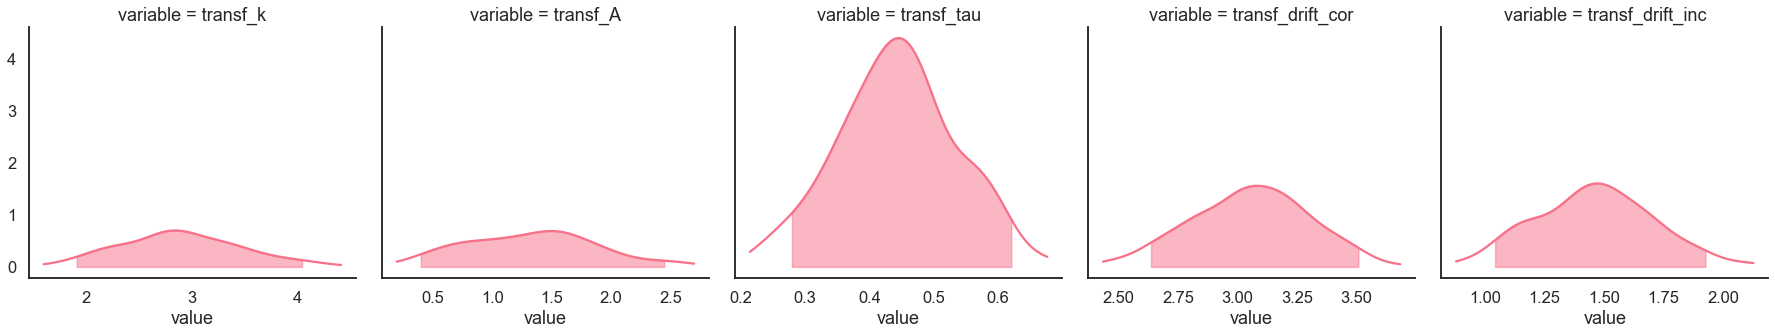

In [11]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

## Posterior predictives

### Ungrouped

In [12]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=100)
pp

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         1.516327  2.351153  1.374823  1.259839  1.737453  1.795027   
2         2.001821  1.769339  2.727762  1.154691  1.739145  2.136975   
3         1.469450  1.321076  1.330849  1.506188  2.410157  1.570472   
4         1.936574  2.310510  1.191331  1.513816  1.419566  1.744239   
5         2.282956  1.277201  1.645373  1.201756  1.491680  2.866956   
...            ...       ...       ...       ...       ...       ...   
96        1.483665  1.542446  1.338777  1.576400  1.746624  1.512970   
97        2.272836  1.255672  1.517556  1.219169  2.070153  4.923164   
98        1.742976  1.740401  1.649284  1.079161  2.836790  1.464754   
99        1.759882  1.424342  1.860511  1.557248  1.560753  1.266516   
100       2.765884  2.133757  1.742483  1.367743  1.752768  1.637506   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      231  232  233  234   
sample                                            ...                           
1         1.394409  1.952504  2.448559  1.368657  ...      0.0  1.0  1.0  0.0   
2         1.387038  2.166988  1.361053  1.296931  ...      1.0  1.0  1.0  1.0   
3         1.103934  1.530620  1.486711  2.534645  ...      1.0  1.0  1.0  1.0   
4         2.669610  2.074534  2.434702  1.807426  ...      1.0  1.0  1.0  0.0   
5         1.437065  1.960114  1.391610  1.184987  ...      1.0  1.0  1.0  1.0   
...            ...       ...       ...       ...  ...      ...  ...  ...  ...   
96        1.466700  1.301714  1.977307  1.306723  ...      1.0  1.0  0.0  1.0   
97        1.603480  1.627364  1.343404  2.043014  ...      0.0  1.0  1.0  1.0   
98        3.592029  1.361144  3.040886  1.396092  ...      1.0  1.0  1.0  1.0   
99        1.235101  1.435248  1.544745  1.537176  ...      1.0  1.0  1.0  0.0   
100       1.523769  1.186625  1.484621  1.719729  ...      1.0  0.0  1.0  1.0   

variable                                
trial     235  236  237  238  239  240  
sample                                  
1         1.0  1.0  1.0  1.0  1.0  1.0  
2         0.0  0.0  1.0  0.0  0.0  1.0  
3         1.0  0.0  1.0  1.0  1.0  1.0  
4         1.0  1.0  1.0  1.0  0.0  1.0  
5         0.0  1.0  1.0  1.0  1.0  0.0  
...       ...  ...  ...  ...  ...  ...  
96        1.0  1.0  1.0  1.0  1.0  1.0  
97        1.0  1.0  0.0  1.0  1.0  1.0  
98        1.0  1.0  1.0  1.0  1.0  0.0  
99        1.0  1.0  1.0  1.0  1.0  0.0  
100       1.0  1.0  1.0  1.0  1.0  1.0  

[100 rows x 480 columns]

In [13]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_incorrect,quant_30_rt_incorrect,quant_50_rt_incorrect,quant_70_rt_incorrect,quant_90_rt_incorrect,quant_10_rt_correct,quant_30_rt_correct,quant_50_rt_correct,quant_70_rt_correct,quant_90_rt_correct
sample,,,,,,,,,,,,,
1,0.854167,1.696167,1.988204,1.499848,1.644013,1.900039,2.187541,2.903518,1.188796,1.376445,1.552943,1.765277,2.151452
2,0.866667,1.726863,8.552910,1.518115,1.640610,1.876076,2.004737,2.317148,1.244394,1.380747,1.560290,1.759367,2.126895
3,0.883333,1.750167,1.084382,1.531423,1.752821,1.866646,2.367882,2.740933,1.231212,1.453110,1.633113,1.847774,2.293020
4,0.891667,1.650683,0.907857,1.484965,1.617946,1.823915,1.973096,2.571463,1.210694,1.400524,1.533510,1.752159,2.160593
5,0.845833,1.655703,2.292643,1.408410,1.570832,1.827004,1.965207,2.482023,1.236970,1.393996,1.503147,1.708311,2.102912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.812500,1.716487,3.384318,1.328627,1.505986,1.778971,1.993181,2.972509,1.173894,1.358528,1.489935,1.718626,2.228806
97,0.912500,1.674961,1.593930,1.476505,1.544206,1.863672,2.155558,2.453028,1.202290,1.386615,1.547794,1.761600,2.187730
98,0.879167,1.638210,1.604118,1.433736,1.666634,1.831126,1.902409,2.427948,1.212284,1.378741,1.553583,1.727408,2.038323


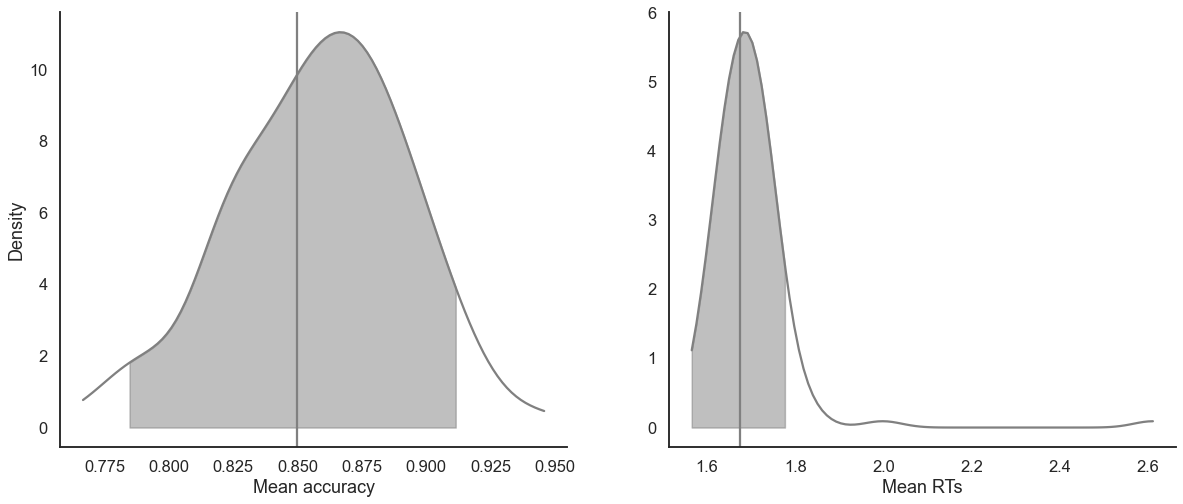

In [14]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

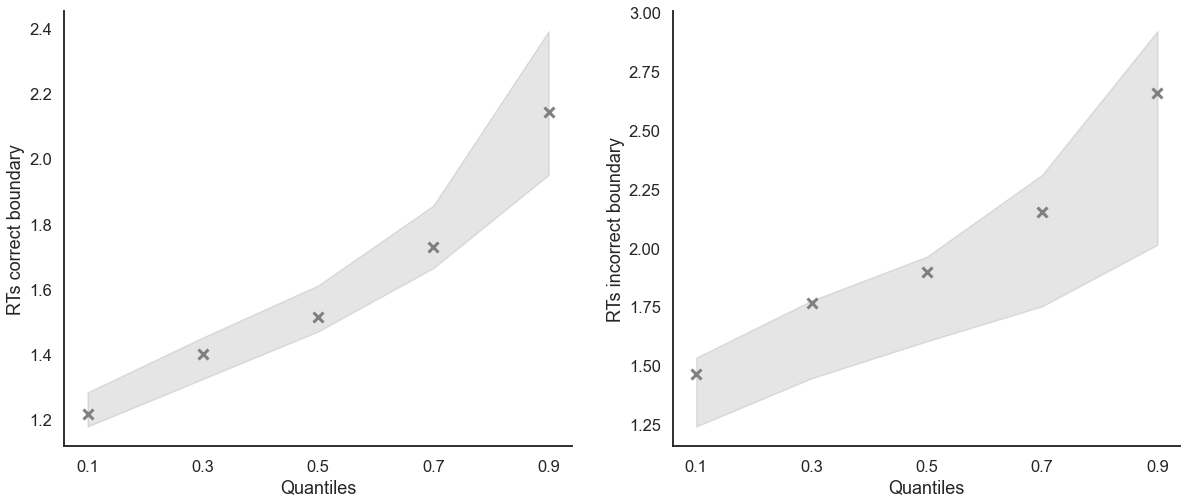

In [15]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

### Grouped

In [16]:
import numpy as np

In [17]:
# Define new grouping variables, in this case, for the different choice pairs, but any grouping var can do
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [18]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1           AB          1                1.00  1.681408  0.903394   
                        2                0.85  1.562615  1.231232   
                        3                0.85  1.669896  1.833117   
                        4                0.85  1.706396  0.553683   
                        5                0.80  1.462708 -0.004163   
...                                       ...       ...       ...   
3           CD          96               0.80  1.773238  0.790351   
                        97               0.70  1.738502  1.280425   
                        98               0.85  1.684924  2.002707   
                        99               0.85  1.708116  2.894151   
                        100              0.90  1.519268  1.147537   

                                quant_30_rt_incorrect  quant_30_rt_correct  \
block_label choice_pair sample                                               
1           AB          1                         NaN             1.399812   
                        2                    1.487588             1.361251   
                        3                    1.828193             1.511834   
                        4                    1.957702             1.391453   
                        5                    1.605232             1.306055   
...                                               ...                  ...   
3           CD          96                   1.196426             1.591572   
                        97                   1.659392             1.427214   
                        98                   1.812207             1.457479   
                        99                   1.635211             1.399594   
                        100                  2.262331             1.286692   

                                quant_50_rt_incorrect  quant_50_rt_correct  \
block_label choice_pair sample                                               
1           AB          1                         NaN             1.514297   
                        2                    1.588107             1.423942   
                        3                    2.081510             1.548741   
                        4                    2.014691             1.545602   
                        5                    1.666439             1.367250   
...                                               ...                  ...   
3           CD          96                   1.585557             1.718615   
                        97                   1.724478             1.604408   
                        98                   1.878493             1.529541   
                        99                   1.652487             1.476365   
                        100                  2.272119             1.360012   

                                quant_70_rt_incorrect  quant_70_rt_correct  
block_label choice_pair sample                                              
1           AB          1                         NaN             1.794489  
                        2                    1.850989             1.668351  
                        3                    2.384440             1.649412  
                        4                    2.092177             1.620288  
                        5                    1.720746             1.516865  
...                                               ...                  ...  
3           CD          96                   2.026946             1.914956  
                        97                   1.759436             2.106875  
                        98                   2.325211             1.637719  
                        99                   1.665329             1.638770  
                        100                  2.281907             1.400676  

[1200 rows x 9 columns]

In [19]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_incorrect  \
block_bins sample                                                             
1          1            0.766667  1.638274  0.956465               1.589372   
           2            0.833333  1.612351  0.655012               1.496590   
           3            0.900000  1.629827  0.913520               2.083429   
           4            0.833333  1.669009  2.153573               1.600106   
           5            0.900000  1.687632  1.143709               1.695958   
...                          ...       ...       ...                    ...   
8          96           0.900000  1.639858  3.603518               2.077193   
           97           0.866667  1.714154  0.930458               1.655048   
           98           0.933333  1.691284  0.810072               2.071750   
           99           0.966667  1.550891  1.024852               1.551561   
           100          0.833333  1.852512  2.368602               1.572443   

                   quant_30_rt_correct  quant_50_rt_incorrect  \
block_bins sample                                               
1          1                  1.371125               1.820360   
           2                  1.402016               1.506009   
           3                  1.390501               2.089259   
           4                  1.391325               1.714567   
           5                  1.394622               1.711742   
...                                ...                    ...   
8          96                 1.400877               2.340582   
           97                 1.419414               1.838018   
           98                 1.378320               2.177797   
           99                 1.344609               1.551561   
           100                1.359105               1.754043   

                   quant_50_rt_correct  quant_70_rt_incorrect  \
block_bins sample                                               
1          1                  1.539141               2.078767   
           2                  1.477792               1.513142   
           3                  1.479533               2.215808   
           4                  1.546952               1.831776   
           5                  1.623764               1.900608   
...                                ...                    ...   
8          96                 1.432593               3.211126   
           97                 1.586430               2.046019   
           98                 1.628068               2.283844   
           99                 1.481813               1.551561   
           100                1.594390               1.803764   

                   quant_70_rt_correct  
block_bins sample                       
1          1                  1.730869  
           2                  1.731665  
           3                  1.655838  
           4                  1.676594  
           5                  1.794966  
...                                ...  
8          96                 1.553350  
           97                 1.790083  
           98                 1.846477  
           99                 1.662538  
           100                1.837678  

[800 rows x 9 columns]

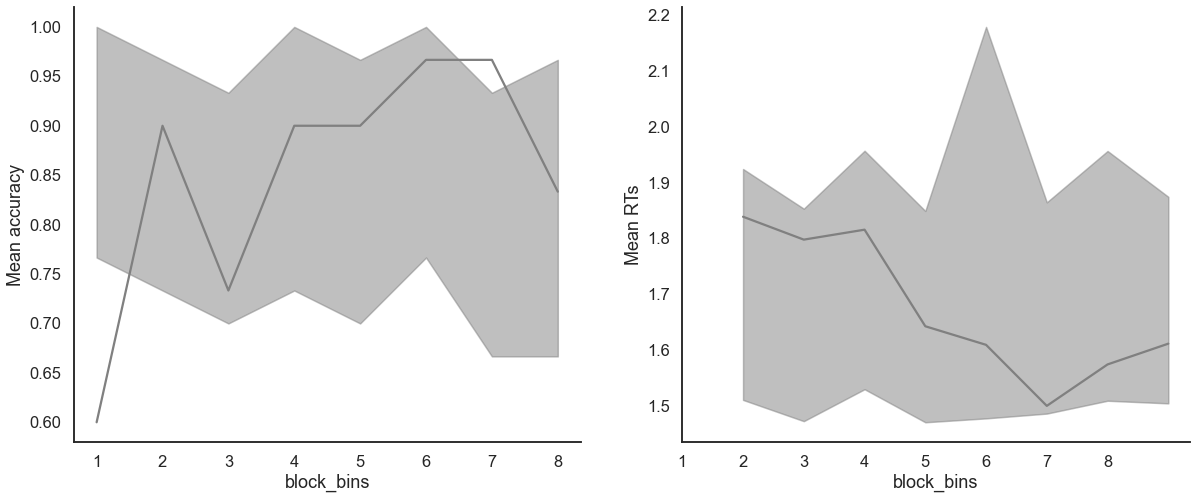

In [20]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

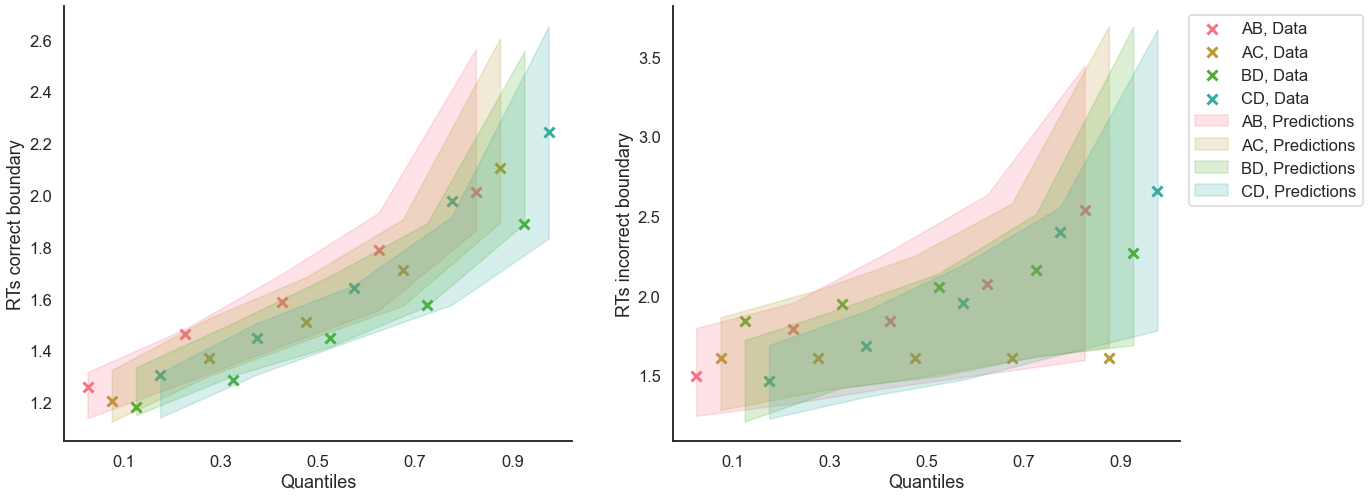

In [21]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='choice_pair',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9]);